Import Dependencies


//////////////////////////////////////////////////////

In [1]:
import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Load SEG-Y Data



......................

In [2]:
segy_file = pathlib.Path("F:\Seismic\Seismic Data Analysis code/ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534.segy")
print("SEG-Y exists:", segy_file.exists())

SEG-Y exists: True


In [3]:
from segysak.segy import segy_loader
seisnc_vol = segy_loader(segy_file,iline=189, xline=193, cdpx=181, cdpy=185, vert_domain='TWT')

c:\users\palun\appdata\local\programs\python\python36\lib\site-packages\segysak\segy\_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0.00/257k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/257k [00:00<?, ? traces/s]

Lets Load some Horizon Data




............................................


In [4]:
top_hugin_path = pathlib.Path("F:\Seismic\Seismic Data Analysis code/Hugin.dat")
print("File", top_hugin_path, "exists?", top_hugin_path.exists())

File F:\Seismic\Seismic Data Analysis code\Hugin.dat exists? True


In [5]:

# check the file layout
with open(top_hugin_path) as f:
    lines = [next(f) for i in range(5)]
print(*lines)

9976.0000000,2469.0000000,432186.7131505,6477029.1557307,2776.2751465
 9977.0000000,2469.0000000,432189.7375241,6477041.2843388,2779.6577148
 9978.0000000,2469.0000000,432192.7618977,6477053.4129469,2780.4650879
 9979.0000000,2469.0000000,432195.7862713,6477065.5415550,2780.9499512
 9980.0000000,2469.0000000,432198.8106449,6477077.6701631,2781.7697754



In [6]:
top_hugin_df = pd.read_csv(top_hugin_path, names=["iline","xline","cdp_x","cdp_y","twt_hugin"], sep=',')
top_hugin_df.head()

,iline,xline,cdp_x,cdp_y,twt_hugin
0,9976.0,2469.0,432186.713151,6.477029e+06,2776.275147
1,9977.0,2469.0,432189.737524,6.477041e+06,2779.657715
2,9978.0,2469.0,432192.761898,6.477053e+06,2780.465088
3,9979.0,2469.0,432195.786271,6.477066e+06,2780.949951
4,9980.0,2469.0,432198.810645,6.477078e+06,2781.769775


In [7]:
top_hugin_ds = seisnc_vol.seis.surface_from_points(top_hugin_df, 'twt_hugin', right=('cdp_x', 'cdp_y'))
print(top_hugin_ds)

<xarray.Dataset>
Dimensions:    (iline: 401, twt: 850, xline: 640)
Coordinates:
  * iline      (iline) uint64 9961 9962 9963 9964 ... 10358 10359 10360 10361
  * xline      (xline) uint64 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
  * twt        (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x      (iline, xline) float32 nan nan 4.383e+05 ... 4.318e+05 4.318e+05
    cdp_y      (iline, xline) float32 nan nan 6.475e+06 ... 6.482e+06 6.482e+06
Data variables:
    twt_hugin  (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT : STATOIL                              PR...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    corner_points:       None
    corner_points_xy:    None
    source_file:         ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK...
    srd:                 None
    datatype:       

In [8]:
top_hugin_ds.cdp_x.values
top_hugin_ds.cdp_y.values

array([[      nan,       nan, 6475317. , ...,       nan, 6477240. ,
              nan],
       [      nan,       nan, 6475329. , ...,       nan, 6477252.5,
              nan],
       [6475335. , 6475338. , 6475341.5, ..., 6477261.5, 6477264.5,
        6477267.5],
       ...,
       [      nan, 6480141.5, 6480144. , ..., 6482064.5, 6482067.5,
        6482070.5],
       [      nan, 6480153. , 6480156. , ..., 6482076.5, 6482080. ,
        6482082.5],
       [6480162. , 6480165. , 6480168. , ..., 6482089. , 6482092. ,
        6482094.5]], dtype=float32)

In [9]:
m=pd.DataFrame(top_hugin_ds.cdp_x.values)
n=pd.DataFrame(top_hugin_ds.cdp_y.values)


In [10]:
m=m.interpolate(method ='linear', limit_direction ='backward').to_numpy()
n=n.interpolate(method ='linear', limit_direction ='backward').to_numpy()

In [11]:
top_hugin_ds.cdp_x.values[:,:]=m[:,:]
top_hugin_ds.cdp_y.values[:,:]=n[:,:]

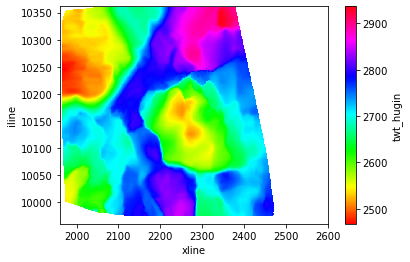

In [12]:
top_hugin_ds.twt_hugin.plot(cmap='hsv')

In [13]:
################################################################################################################################

In [14]:
cube = segy_loader(segy_file.absolute(),iline=189, xline=193, cdpx=181, cdpy=185, vert_domain='TWT')

  0%|          | 0.00/257k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/257k [00:00<?, ? traces/s]

In [15]:
cube

<xarray.Dataset>
Dimensions:  (iline: 401, twt: 850, xline: 640)
Coordinates:
  * iline    (iline) uint64 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xline    (xline) uint64 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 nan nan 4.383e+05 ... 4.318e+05 4.318e+05
    cdp_y    (iline, xline) float32 nan nan 6.475e+06 ... 6.482e+06 6.482e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 ... 0.006268 0.007193 0.0
Attributes:
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT : STATOIL                              PR...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    corner_points:       None
    corner_points_xy:    None
    source_file:         ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK...
    srd:                 None
    datatype:            None
    percentiles:         [-1.3594593507705033, -1.2440498693503912, -0.120575...
    coord_scalar:        -100.0

In [16]:
cube.seis.calc_corner_points()
corners = np.array(cube.attrs["corner_points_xy"])
corners

array([[       nan,        nan],
       [       nan,        nan],
       [ 431762.3 , 6482094.5 ],
       [ 439512.47, 6480162.  ]], dtype=float32)

In [17]:
hrz=top_hugin_df.drop(["iline","xline"],axis=1)
# hrz=hrz.drop(["xline"],axis=1)
hrz.head()

,cdp_x,cdp_y,twt_hugin
0,432186.713151,6.477029e+06,2776.275147
1,432189.737524,6.477041e+06,2779.657715
2,432192.761898,6.477053e+06,2780.465088
3,432195.786271,6.477066e+06,2780.949951
4,432198.810645,6.477078e+06,2781.769775


In [18]:
from scipy.interpolate import griddata

xi = np.linspace(hrz.cdp_x.min(), hrz.cdp_x.max(), 250)
yi = np.linspace(hrz.cdp_y.min(), hrz.cdp_y.max(), 2500)
X, Y = np.meshgrid(xi, yi)
Z = griddata((hrz.cdp_x, hrz.cdp_y), hrz.twt_hugin, (X, Y))

Text(0.5, 1.0, 'Top Hugin fm.')

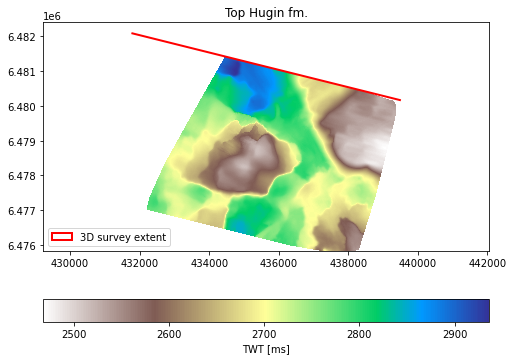

In [19]:
from matplotlib.patches import Polygon

survey_limits = Polygon(
    corners, fill=False, edgecolor="r", linewidth=2, label="3D survey extent"
)

f, ax = plt.subplots(figsize=(8, 6))
pp = ax.pcolormesh(X, Y, Z, cmap="terrain_r")
f.colorbar(pp, orientation="horizontal", label="TWT [ms]")
ax.add_patch(survey_limits)
ax.axis("equal")
ax.legend()
ax.set_title("Top Hugin fm.")

In [20]:
#########-------------------------------------------------------------------------------------------------------################

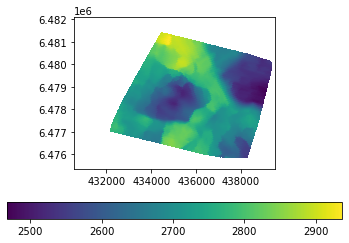

In [21]:
axs = plt.subplot()
mesh = axs.pcolormesh(
    top_hugin_ds.cdp_x.values,
    top_hugin_ds.cdp_y.values,
    top_hugin_ds.twt_hugin.values,
    shading="auto"
)
axs.set_aspect(1)
_ = plt.colorbar(mesh, orientation="horizontal")

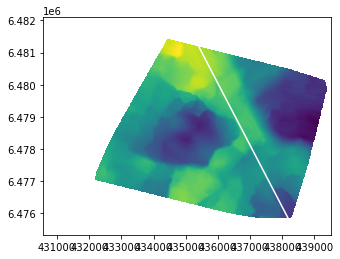

In [22]:
tform = seisnc_vol.seis.get_affine_transform()

axs = plt.subplot()
mesh = axs.pcolormesh(
    top_hugin_ds.iline,
    top_hugin_ds.xline,
    top_hugin_ds.twt_hugin.T,
    shading="auto",
    transform=tform + axs.transData
)
axs.set_aspect(1)
_ = axs.plot([9976, 10361], [1961, 2300], transform=tform + axs.transData, color="w")

Plotting Horizons on vertical section views

...........................................

In [23]:
# assign horizon back to seismic
seisnc_vol["hugin"] = top_hugin_ds.twt_hugin
print(seisnc_vol)

<xarray.Dataset>
Dimensions:  (iline: 401, twt: 850, xline: 640)
Coordinates:
  * iline    (iline) uint64 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xline    (xline) uint64 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.383e+05 4.383e+05 ... 4.318e+05 4.318e+05
    cdp_y    (iline, xline) float32 6.475e+06 6.475e+06 ... 6.482e+06 6.482e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 ... 0.006268 0.007193 0.0
    hugin    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT : STATOIL                              PR...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    corner_points:       ((9961, 1961), (9961, 2600), (10361, 2600), (10361, ...
    corner_points_xy:    ((43830

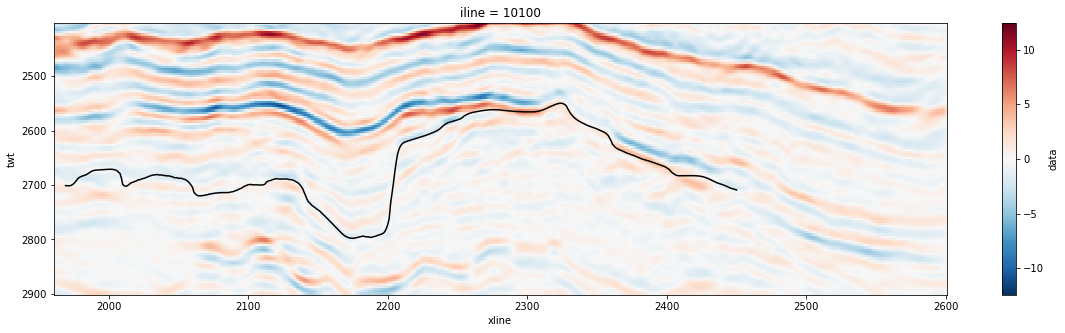

In [24]:
# plotting
iline_subsel = seisnc_vol.sel(iline=10100, twt=range(2402, 2900, 4), method='nearest')
fig, axs = plt.subplots(figsize=(20, 5))
iline_subsel.data.T.plot(ax=axs, yincrease=False)
_ = axs.plot(iline_subsel.xline, iline_subsel.hugin, 'k')

Seismic amplitude maps

.............................................................

In [29]:
amp = seisnc_vol.data.interp({"twt": seisnc_vol.hugin}, method='linear')

c:\users\palun\appdata\local\programs\python\python36\lib\site-packages\scipy\interpolate\interpolate.py:2539: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
c:\users\palun\appdata\local\programs\python\python36\lib\site-packages\scipy\interpolate\interpolate.py:2540: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


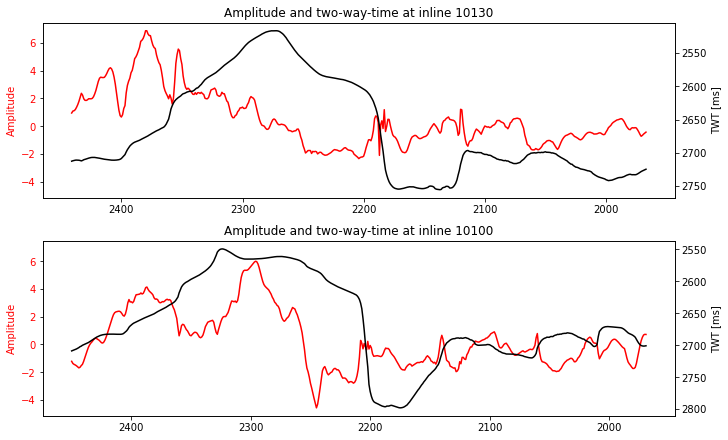

In [30]:
inl_sel = [10130, 10100]

f, ax = plt.subplots(nrows=2, figsize=(10, 6), sharey=True, constrained_layout=True)

for i, val in enumerate(inl_sel):
    axz = ax[i].twinx()
    x, t = amp.sel(iline=val).xline, amp.sel(iline=val).twt
    a = amp.sel(iline=val).data
    ax[i].plot(x, a, color="r")
    axz.plot(x, t, color="k")
    ax[i].invert_xaxis()
    axz.invert_yaxis()
    ax[i].set_ylabel("Amplitude", color="r")
    plt.setp(ax[i].yaxis.get_majorticklabels(), color="r")
    axz.set_ylabel("TWT [ms]")
    ax[i].set_title("Amplitude and two-way-time at inline {}".format(val))

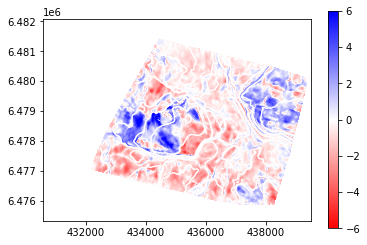

In [31]:
axs = plt.subplot()
mesh = axs.pcolormesh(amp.iline, amp.xline, amp.T, transform=tform + axs.transData, shading="auto", cmap="bwr_r", vmin=-6, vmax=6)
ctr = axs.contour(top_hugin_ds.cdp_x, top_hugin_ds.cdp_y, top_hugin_ds.twt_hugin, colors='w')
axs.set_aspect(1)
plt.colorbar(mesh)